In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

import utils

In [2]:
def plot(activation):
    plt.figure()
    x = np.linspace(-5, 5)
    y = activation(x)
    plt.plot(x, y)
    plt.title(activation.__name__)
    plt.grid(True)
    plt.show()

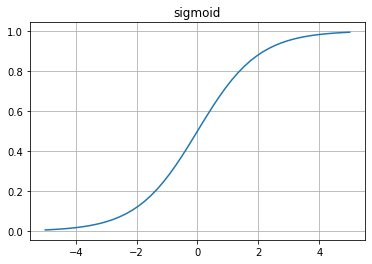

In [3]:
plot(keras.activations.sigmoid)

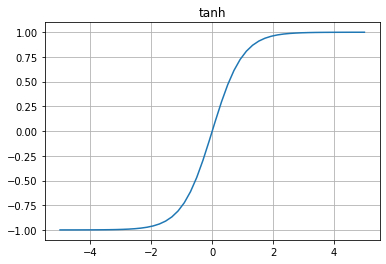

In [4]:
plot(keras.activations.tanh)

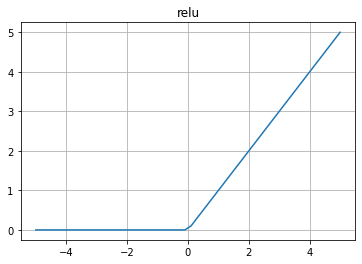

In [5]:
plot(keras.activations.relu)

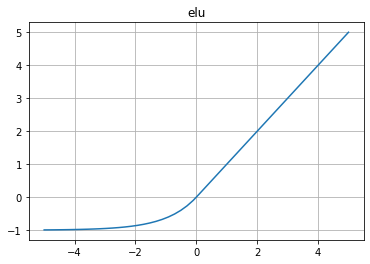

In [6]:
plot(keras.activations.elu)

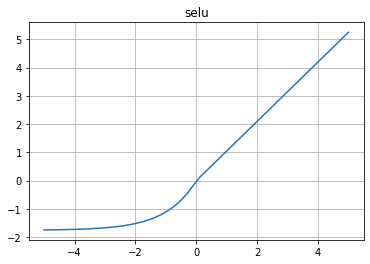

In [7]:
plot(keras.activations.selu)

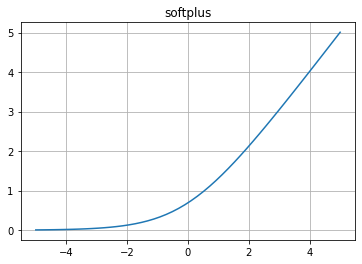

In [8]:
plot(keras.activations.softplus)

In [9]:
np.random.seed(42)

a = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    w = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    a = keras.activations.selu(np.dot(a, w))
    means = np.mean(a, axis=0).mean()
    stds = np.std(a, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [10]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

mean = train_images.mean(axis=0, keepdims=True)
std = train_images.std(axis=0, keepdims=True)

train_images = (train_images - mean) / std
print(f"train_images.shape = {train_images.shape}, train_labels.shape = {train_labels.shape}")

test_images =  (test_images - mean) / std
print(f"test_images.shape = {test_images.shape}, test_labels.shape = {test_labels.shape}")

train_images.shape = (60000, 28, 28), train_labels.shape = (60000,)
test_images.shape = (10000, 28, 28), test_labels.shape = (10000,)


In [11]:
def build_model(activation, kernel_initializer):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation=activation, kernel_initializer=kernel_initializer))
    for layer in range(99):
        model.add(keras.layers.Dense(100, activation=activation, kernel_initializer=kernel_initializer))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.SGD(lr=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [12]:
utils.reset_session()

selu_model = build_model('selu', 'lecun_normal')
history = selu_model.fit(
    train_images, train_labels, 
    epochs=5,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 1.1571 - accuracy: 0.5440 - val_loss: 0.8175 - val_accuracy: 0.6905
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7071 - accuracy: 0.7487 - val_loss: 0.9647 - val_accuracy: 0.6078
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5987 - accuracy: 0.7874 - val_loss: 0.5950 - val_accuracy: 0.7857
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5214 - accuracy: 0.8181 - val_loss: 0.5242 - val_accuracy: 0.8229
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5206 - accuracy: 0.8191 - val_loss: 0.5602 - val_accuracy: 0.8077


In [13]:
utils.reset_session()

relu_model = build_model('relu', 'he_normal')
history = relu_model.fit(
    train_images, train_labels, 
    epochs=5,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 1.7446 - accuracy: 0.2925 - val_loss: 1.3335 - val_accuracy: 0.4543
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 1.1096 - accuracy: 0.5322 - val_loss: 0.9383 - val_accuracy: 0.6046
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.8656 - accuracy: 0.6519 - val_loss: 0.7944 - val_accuracy: 0.7179
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.7673 - accuracy: 0.7069 - val_loss: 0.8011 - val_accuracy: 0.6980
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6900 - accuracy: 0.7426 - val_loss: 0.6737 - val_accuracy: 0.7492
